In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
%matplotlib notebook

In [2]:
cd ~/bmi_dynamics_code

/Users/preeyakhanna/bmi_dynamics_code


In [3]:
import ssm
from online_analysis import generate_models, generate_models_utils
import analysis_config

In [4]:
pdb

Automatic pdb calling has been turned ON


In [38]:
dat = pickle.load(open('slds_sweep2_jeev_0.pkl','rb'))

keys = dat['save_params_model'].keys()
np.vstack((keys))

/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


array([['0', '1', '20', '0.0', 'elbo'],
       ['0', '1', '20', '0.01', 'elbo'],
       ['0', '2', '20', '0.0', 'elbo'],
       ['0', '2', '20', '0.01', 'elbo'],
       ['0', '3', '20', '0.0', 'elbo'],
       ['0', '3', '20', '0.01', 'elbo'],
       ['0', '5', '20', '0.0', 'elbo'],
       ['0', '5', '20', '0.01', 'elbo'],
       ['0', '9', '20', '0.0', 'elbo'],
       ['0', '9', '20', '0.01', 'elbo'],
       ['0', '12', '20', '0.0', 'elbo'],
       ['0', '12', '20', '0.01', 'elbo'],
       ['1', '1', '20', '0.0', 'elbo'],
       ['1', '1', '20', '0.01', 'elbo'],
       ['1', '2', '20', '0.0', 'elbo'],
       ['1', '2', '20', '0.01', 'elbo'],
       ['1', '3', '20', '0.0', 'elbo'],
       ['1', '3', '20', '0.01', 'elbo'],
       ['1', '5', '20', '0.0', 'elbo'],
       ['1', '5', '20', '0.01', 'elbo'],
       ['1', '9', '20', '0.0', 'elbo'],
       ['1', '9', '20', '0.01', 'elbo'],
       ['1', '12', '20', '0.0', 'elbo']], dtype='<U32')

<IPython.core.display.Javascript object>


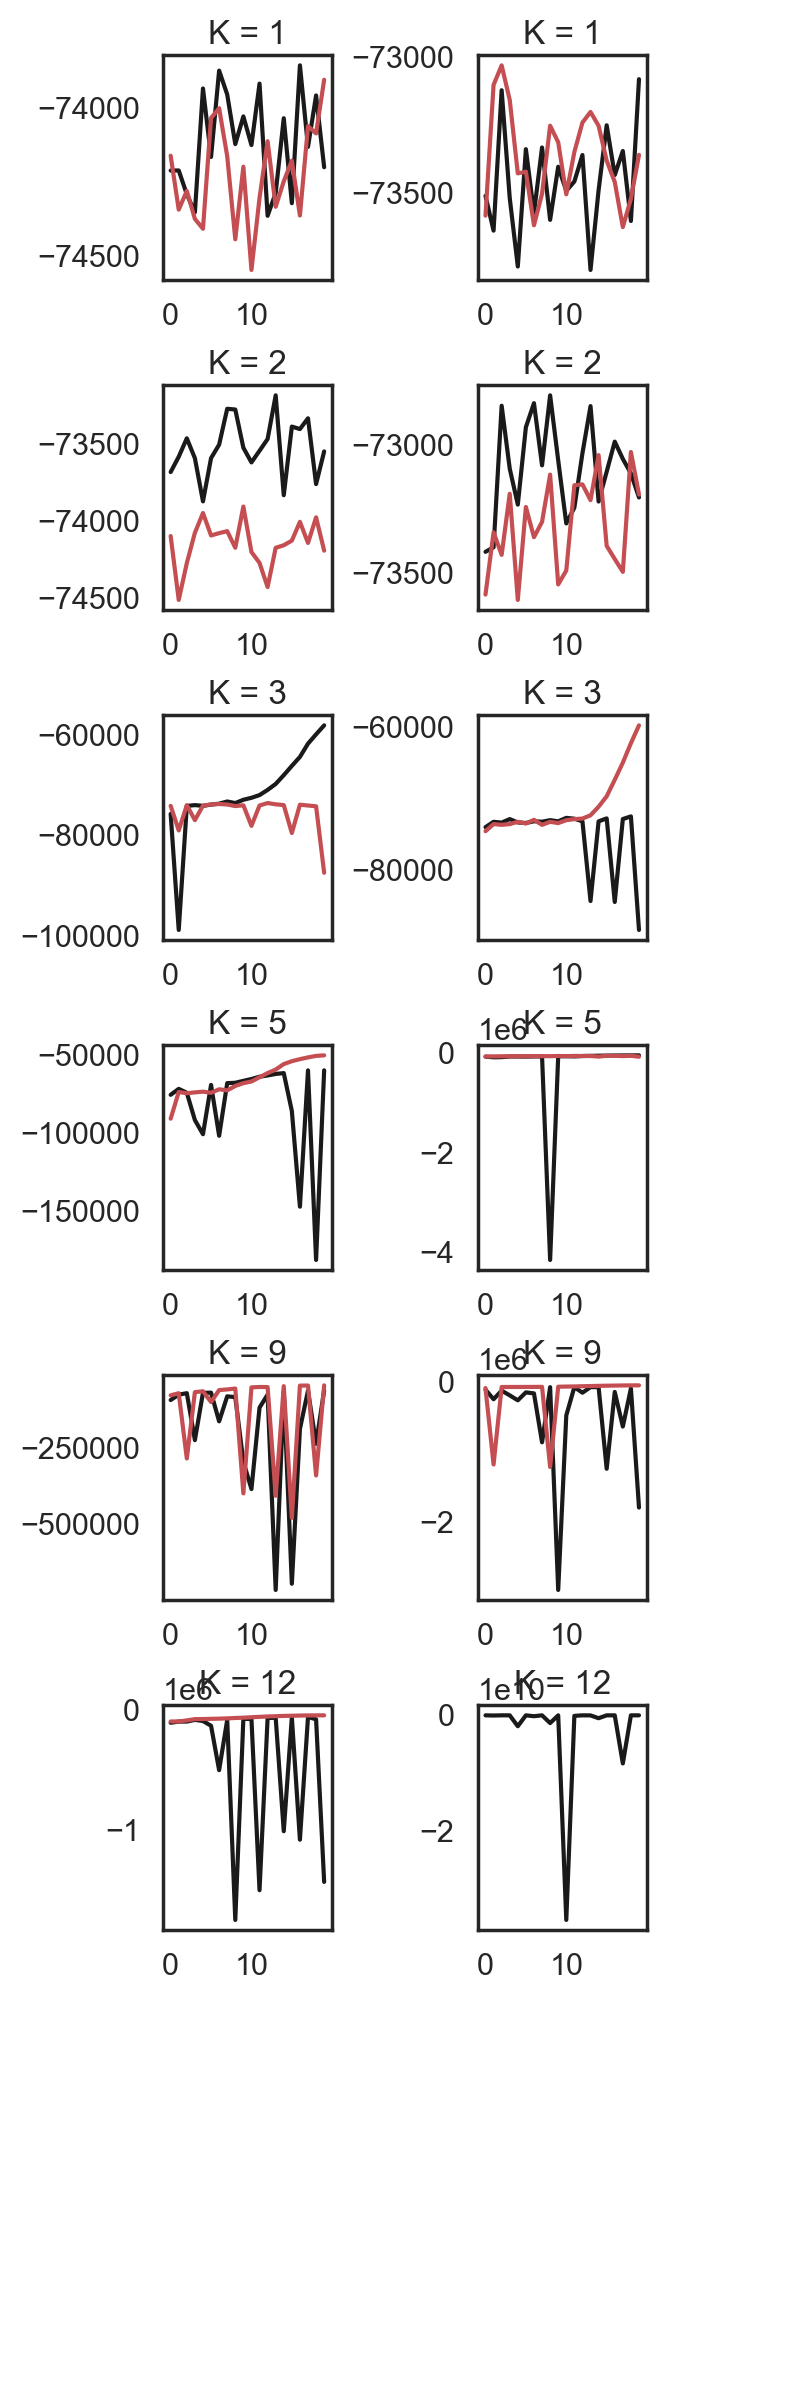

In [39]:
keys = dat['save_params_model'].keys()

### Plot models ### 
f, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(5, 15))
K_opts = dict()
K_opts[1] = 0 
K_opts[2] = 1
K_opts[3] = 2 
K_opts[5] = 3 
K_opts[9] = 4 
K_opts[12] = 5

for k in keys: 
    fold, K, it, alph, _ = k
    if alph == 0.: 
        col='k'
    else:
        col = 'r'

    ix_k = K_opts[K]
    ax[ix_k, fold].plot(np.arange(it), dat['save_params_model'][k][1:], '-', color=col)
    ax[ix_k, fold].set_title('K = %d'%(K))
    
#ax[0, 0].set_ylabel('ELBO - fold 0')
#ax[1, 0].set_ylabel('ELBO - fold 1')

plt.tight_layout()

9

<IPython.core.display.Javascript object>


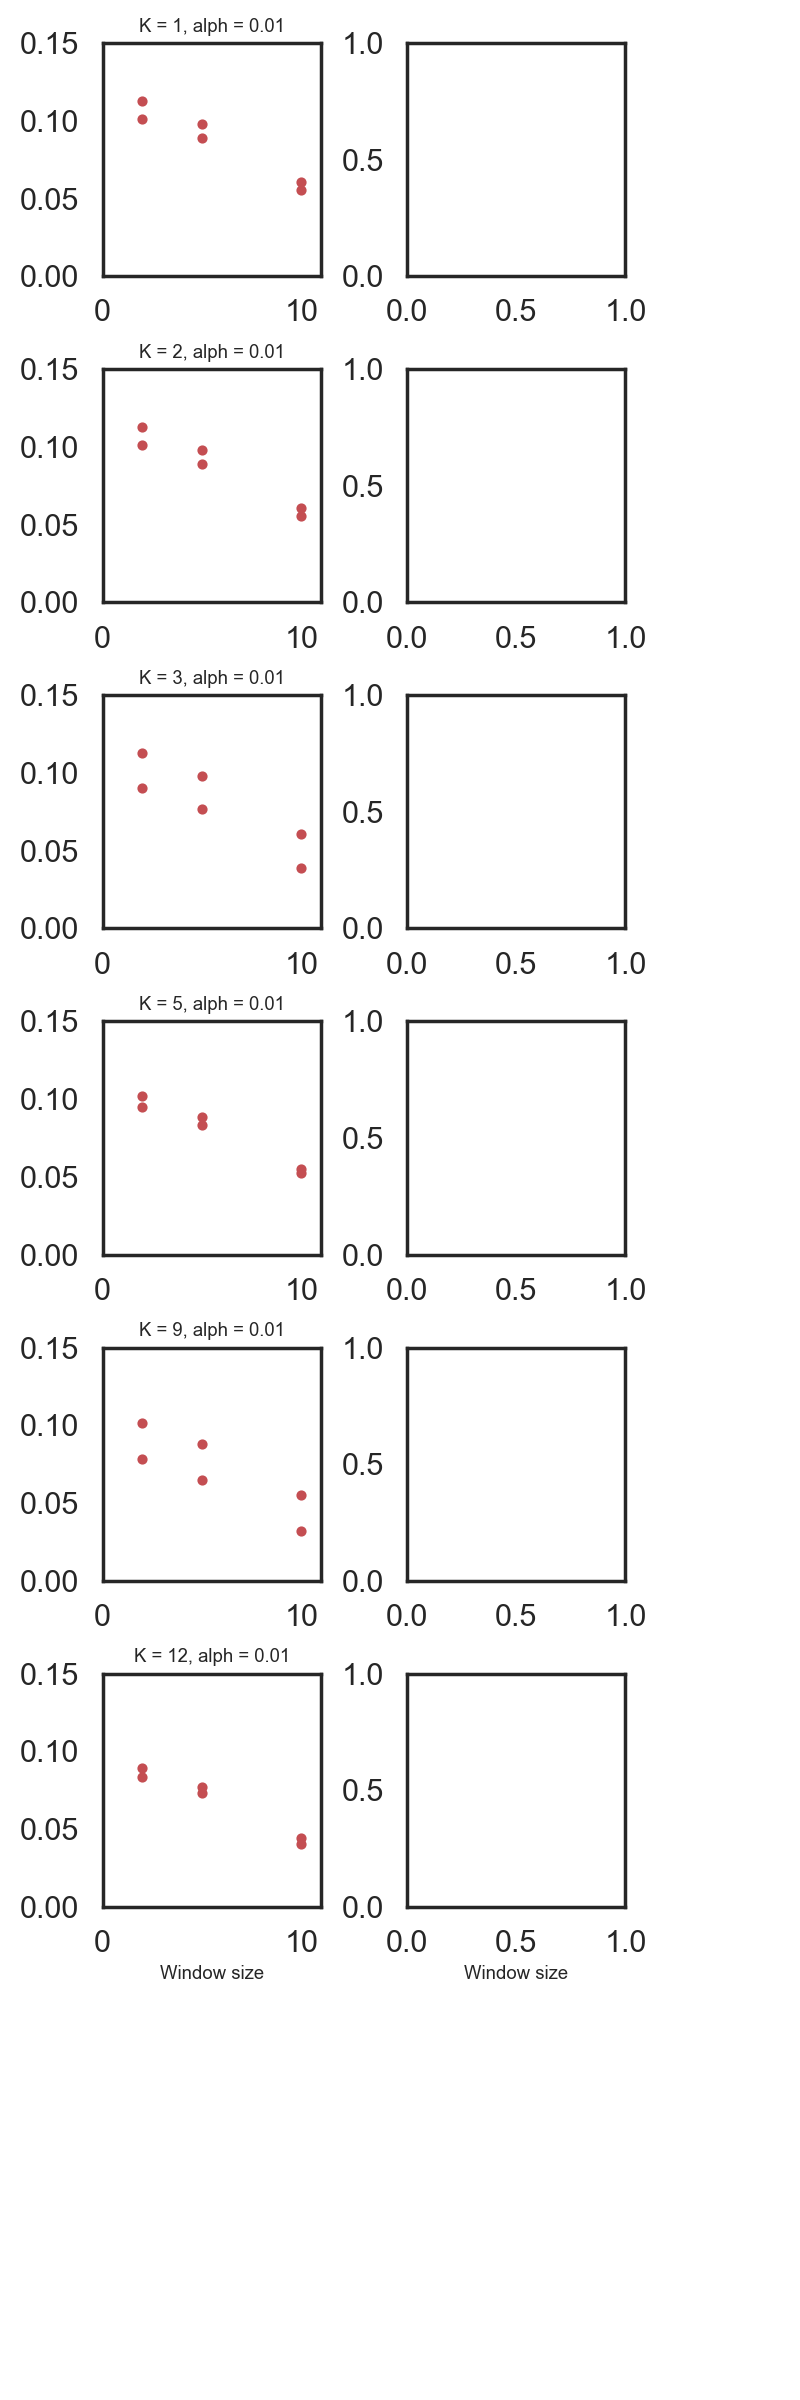

<IPython.core.display.Javascript object>


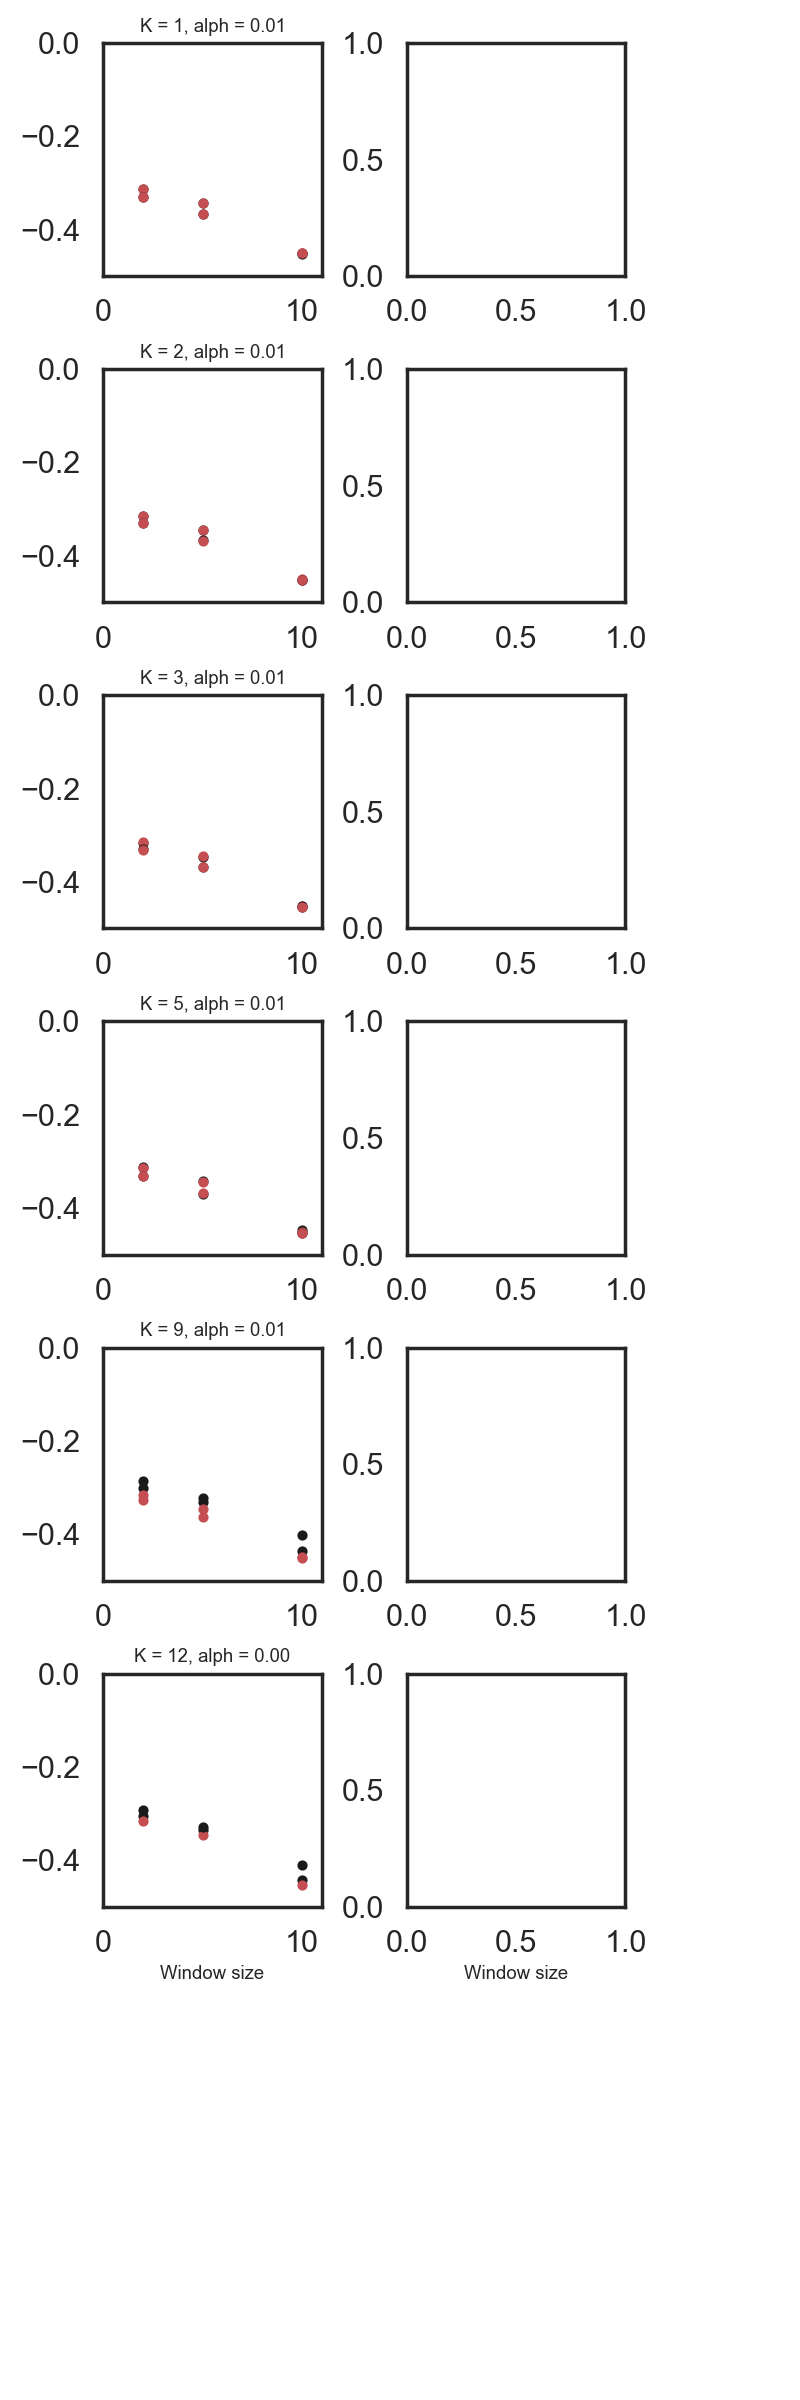

In [42]:
for r2_type in ['pred', 'smooth']: 
    window_size = {}
    f, ax = plt.subplots(ncols = 2, nrows = 6, figsize=(5, 15))

    for _,(k,v) in enumerate(dat['save_params_post'].items()): 
        if len(k) == 7:
            _, K, nit, alph, ws, nit_post, r2 = k; 
        else: 
            _, K, nit, ws, nit_post, r2 = k; 
            alph = 0.01; 
            
        if r2_type in r2: 
            if alph == 0: 
                ia = 0; 
                color='k'
            else: 
                ia = 0; 
                color='r'
            
            
            ax[K_opts[K], ia].plot(ws, v, '.', color=color)
            ax[K_opts[K], ia].set_title('K = %d, alph = %.2f'%(K, alph), fontsize=10)
            ax[K_opts[K], ia].set_xlim([0, 11])
            
            if r2_type == 'pred': 
                ax[K_opts[K], ia].set_ylim([0, .15])
            else: 
                ax[K_opts[K], ia].set_ylim([-0.5, 0.])
            
            
        ax[-1, 0].set_xlabel('Window size', fontsize=10)
        ax[-1, 1].set_xlabel('Window size', fontsize=10)
    
    f.tight_layout()
    
    
#     for ws in window_size.keys(): 
#         tmp = np.hstack((window_size[ws]))
#         ax.bar(ws, np.mean(tmp))
#         ax.errorbar(ws, np.mean(tmp), np.std(tmp)/np.sqrt(len(tmp)), marker='|', color='k')
#         ax.plot(ws + np.zeros((len(tmp))) + 0.2*np.random.randn(len(tmp), ), tmp, 'k.')
#         ax.set_xlabel('Window size (# bins)')
#         ax.set_ylabel("R2 - %s"%r2_type)
#     ax.set_title(r2_type)
#     f.tight_layout()